# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import re
from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
pd.options.mode.chained_assignment = None

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


# Import Dataset

In [2]:
train_data = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv', names=['id','information','type','text'])
val_data = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv', names=['id','information','type','text'])

In [3]:
train_data.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
val_data.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


# Preprocessing

In [5]:
train = train_data
val = val_data

In [6]:
corpus=[]
for i in range(len(train)):
    r = str(train['text'][i])
    r = r.lower()
    r = re.sub('[^a-zA-Z0-9]',' ',r)
    train['text'][i] = r

In [7]:
corpus=[]
for i in range(len(val)):
    r = str(val['text'][i])
    r = r.lower()
    r = re.sub('[^a-zA-Z0-9]',' ',r)
    val['text'][i] = r

# Plotting

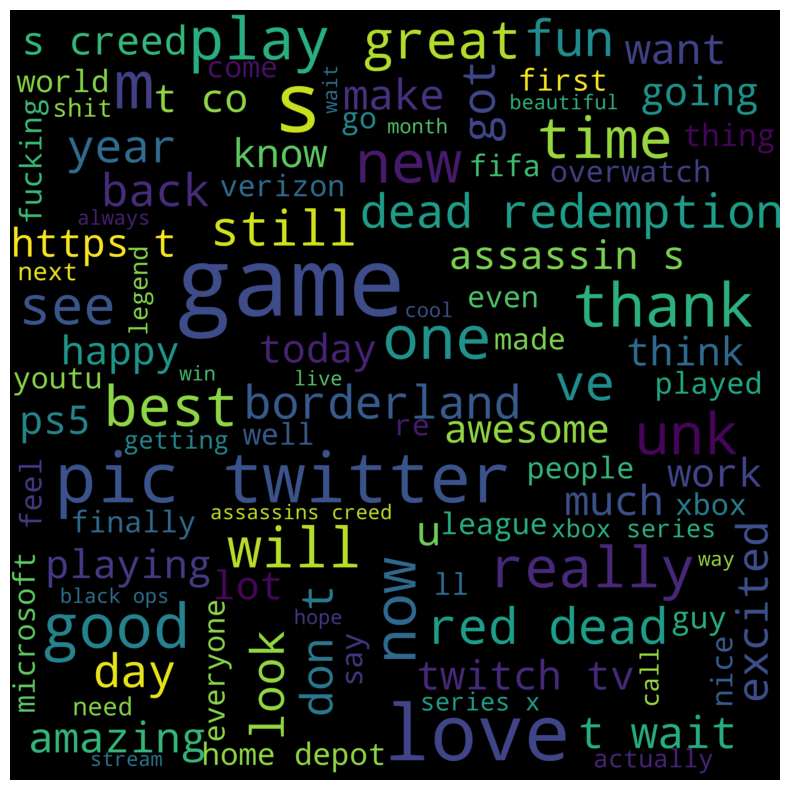

In [8]:
word_cloud = ''.join(train[train["type"]=="Positive"].text)
cloud = WordCloud(max_font_size=100, max_words=100, background_color='black', scale=10, width=800, height=800).generate(word_cloud)
plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

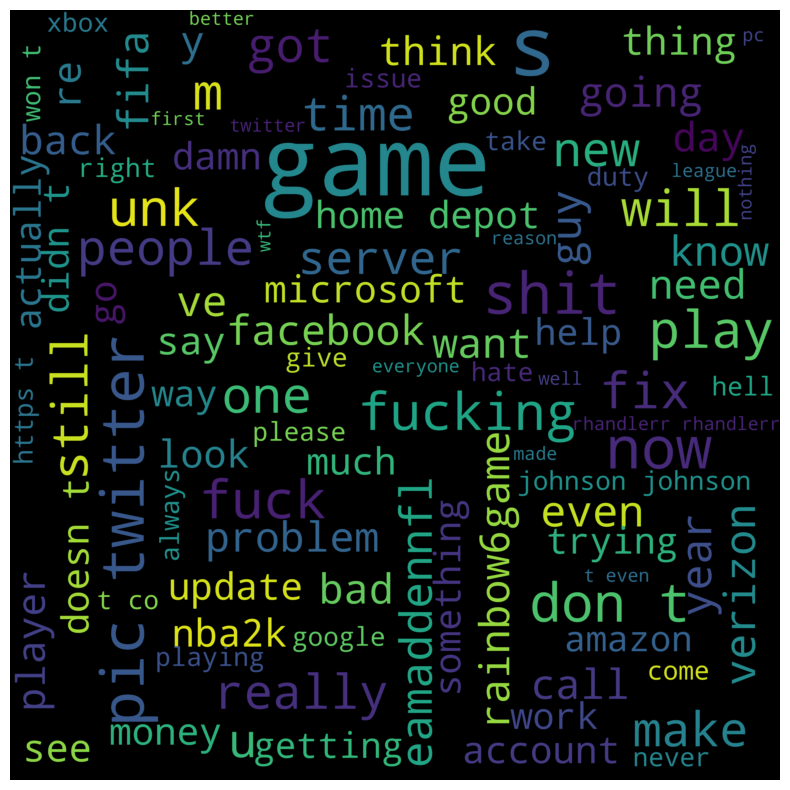

In [9]:
word_cloud = ''.join(train[train["type"]=="Negative"].text)
cloud = WordCloud(max_font_size=100, max_words=100, background_color='black', scale=10, width=800, height=800).generate(word_cloud)
plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
plot = train_data.groupby(by=['information','type']).count().reset_index()
plot.head()

,information,type,id,text
0,Amazon,Irrelevant,192,192
1,Amazon,Negative,576,576
2,Amazon,Neutral,1236,1236
3,Amazon,Positive,312,312
4,ApexLegends,Irrelevant,192,192


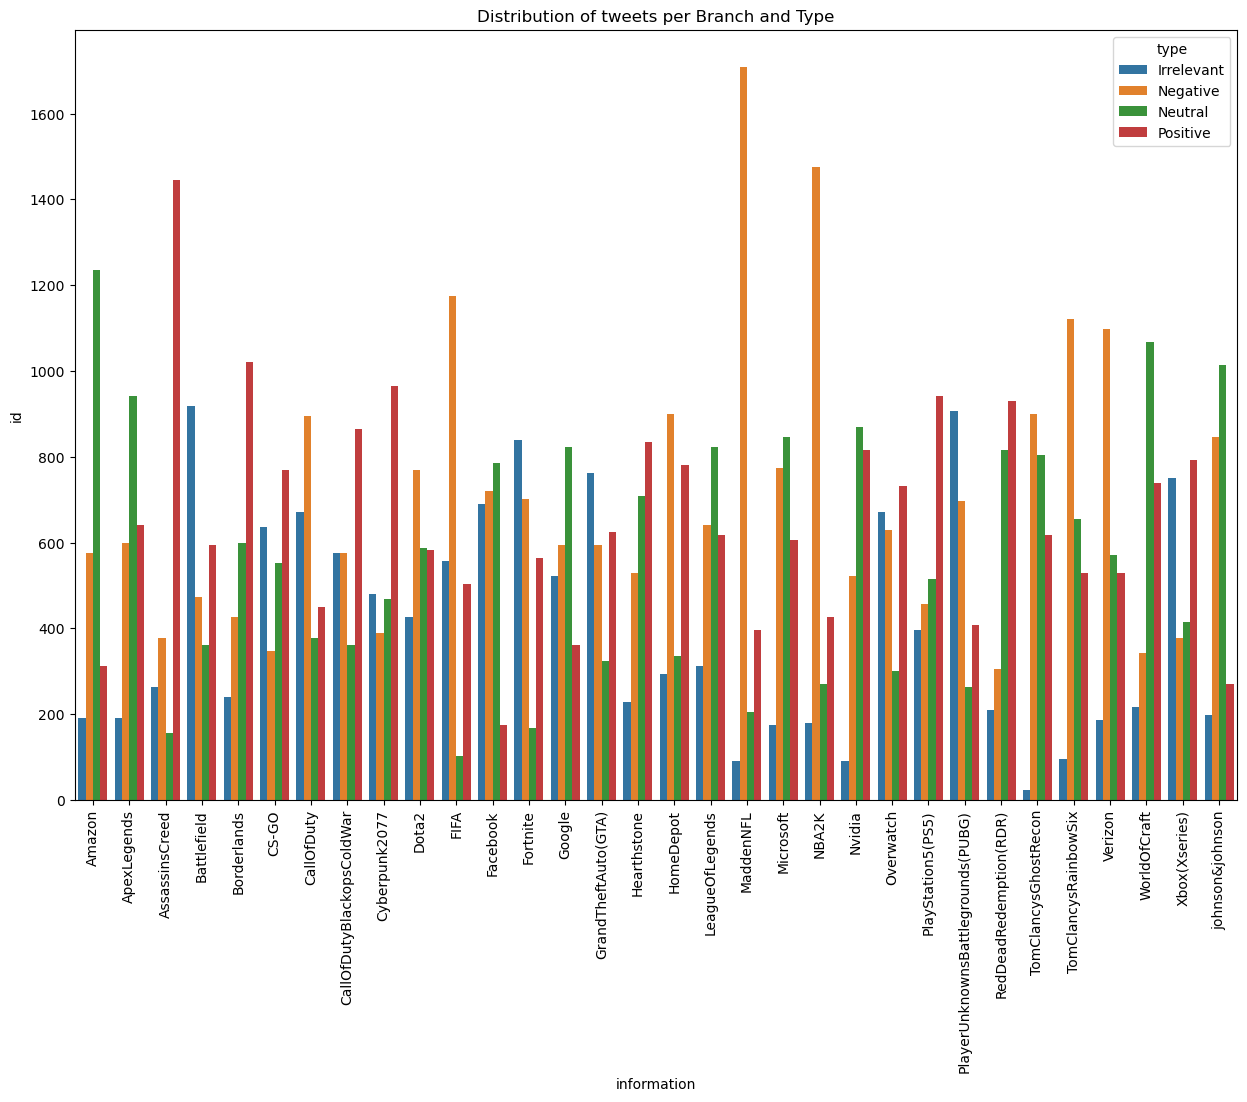

In [11]:
plt.figure(figsize=(15,10))
plt.xlabel('Brand')
plt.ylabel('No of tweets')
sns.barplot(data=plot, x='information', y='id', hue='type')
plt.xticks(rotation=90)
plt.title('Distribution of tweets per Branch and Type')
plt.show()

# Text Analysis

In [12]:
token_texts = [word_tokenize(str(word)) for word in train.text]
token_counters = [item for s in token_texts for item in s]
len(set(token_counters))

30436

In [13]:
token_counters[:5]

['im', 'getting', 'on', 'borderlands', 'and']

In [14]:
stopwords = nltk.corpus.stopwords
stopwords = stopwords.words('english')
len(stopwords)

179

# Logistic Regression Model

In [15]:
# Model(1)

In [16]:
bow_counts = CountVectorizer(tokenizer=word_tokenize, stop_words=stopwords, ngram_range=(1,1))

In [17]:
tr, te = train_test_split(train, test_size=.2, random_state=0)

In [18]:
xtr = bow_counts.fit_transform(tr.text)
xte = bow_counts.transform(te.text)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)


In [19]:
ytr = tr['type']
yte = te['type']

In [20]:
model1 = LogisticRegression(C=1, solver='liblinear', max_iter=200)
model1.fit(xtr, ytr)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(C=1, max_iter=200, solver='liblinear')

In [21]:
yp = model1.predict(xte)
accuracy_score(yte, yp)

0.8150900448550579

In [22]:
xval = bow_counts.transform(val.text)
yval = val['type']

In [23]:
val_res = model1.predict(xval)

In [24]:
accuracy_score(yval, val_res)

0.917

In [25]:
# Model (2)

In [26]:
bow_counts = CountVectorizer(tokenizer=word_tokenize, ngram_range=(1,4))

In [27]:
xtr = bow_counts.fit_transform(tr.text)
xte = bow_counts.transform(te.text)

In [28]:
ytr = tr['type']
yte = te['type']

In [29]:
model2 = LogisticRegression(C=.9, solver='liblinear', max_iter=700)
model2.fit(xtr, ytr)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(C=0.9, max_iter=700, solver='liblinear')

In [30]:
yp = model2.predict(xte)
accuracy_score(yte, yp)

0.9012519247506192

In [31]:
xval = bow_counts.transform(val.text)
yval = val['type']
val_res = model2.predict(xval)
accuracy_score(yval, val_res)

0.982